In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SoccerPlayersData.csv')

In [3]:
df.head()

,player_id,name,role,acted_as_sweeper,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,...,interceptions,recoveries,tackles_attempted,tackles_succeeded,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating
0,169756,Adrian,Keeper,0.0,1.0,0.0,51,0.0,2.0,0.0,...,0,1,0,0,0,1,0.0,NaN,NaN,6.2
1,38807,James Milner,Midfielder,NaN,NaN,NaN,4,NaN,NaN,NaN,...,0,1,0,0,0,1,0.0,NaN,NaN,NaN
2,303339,Sadio Mané,Attacker,NaN,NaN,NaN,16,NaN,NaN,NaN,...,0,1,0,0,0,1,0.0,NaN,NaN,6.1
3,319784,Alisson Becker,Keeper,0.0,1.0,0.0,39,0.0,2.0,0.0,...,0,2,0,0,0,0,1.0,NaN,NaN,6.2
4,760712,Trent Alexander-Arnold,Defender,NaN,NaN,NaN,90,NaN,NaN,NaN,...,2,7,1,1,0,0,NaN,NaN,NaN,7.7


In [4]:
df.drop(columns=['name','player_id'],inplace=True)

<Axes: >

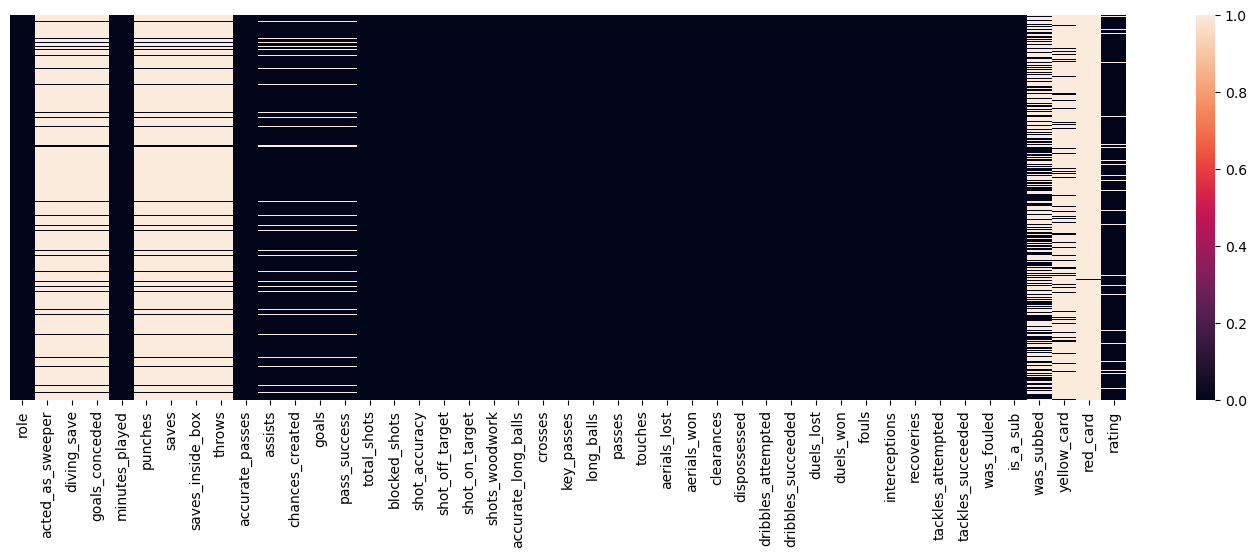

In [5]:
plt.figure(figsize=(18,5))
sns.heatmap(df.isnull(),yticklabels=False)

In [6]:
df.isnull().sum()

role                       6
acted_as_sweeper       20940
diving_save            20940
goals_conceded         20940
minutes_played             0
punches                20940
saves                  20940
saves_inside_box       20940
throws                 20940
accurate_passes            0
assists                 1615
chances_created         1615
goals                   1615
pass_success            1615
total_shots                0
blocked_shots              0
shot_accuracy              0
shot_off_target            0
shot_on_target             0
shots_woodwork             0
accurate_long_balls        0
crosses                    0
key_passes                 0
long_balls                 0
passes                     0
touches                    0
aerials_lost               0
aerials_won                0
clearances                 0
dispossessed               0
dribbles_attempted         0
dribbles_succeeded         0
duels_lost                 0
duels_won                  0
fouls         

In [7]:
df.dropna(subset=['rating'], inplace=True)

In [8]:
df.dropna(subset=['role'], inplace=True)

In [9]:
df= pd.get_dummies(df,columns=['role'], dtype=int)

<Axes: >

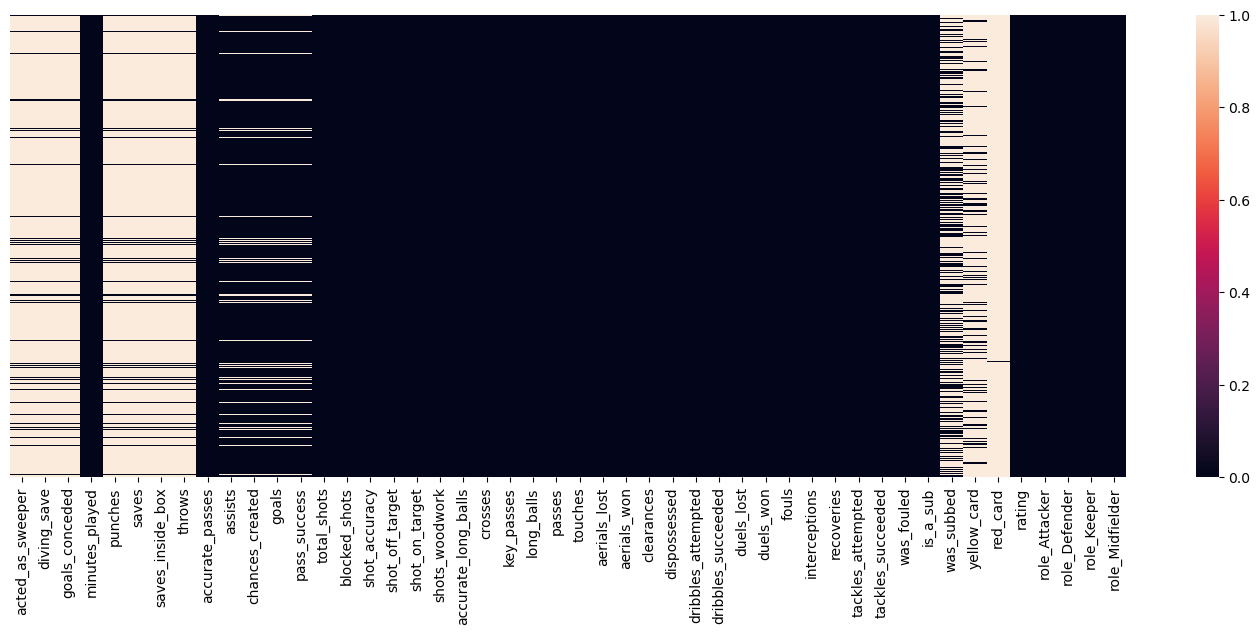

In [10]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [11]:
df.fillna(0,inplace=True)

In [12]:
df.head()

,acted_as_sweeper,diving_save,goals_conceded,minutes_played,punches,saves,saves_inside_box,throws,accurate_passes,assists,...,was_fouled,is_a_sub,was_subbed,yellow_card,red_card,rating,role_Attacker,role_Defender,role_Keeper,role_Midfielder
0,0.0,1.0,0.0,51,0.0,2.0,0.0,0.0,14,0.0,...,0,1,0.0,0.0,0.0,6.2,0,0,1,0
2,0.0,0.0,0.0,16,0.0,0.0,0.0,0.0,9,0.0,...,0,1,0.0,0.0,0.0,6.1,1,0,0,0
3,0.0,1.0,0.0,39,0.0,2.0,0.0,1.0,9,0.0,...,0,0,1.0,0.0,0.0,6.2,0,0,1,0
4,0.0,0.0,0.0,90,0.0,0.0,0.0,0.0,24,1.0,...,0,0,0.0,0.0,0.0,7.7,0,1,0,0
5,0.0,0.0,0.0,90,0.0,0.0,0.0,0.0,45,0.0,...,0,0,0.0,0.0,0.0,7.0,0,1,0,0


In [14]:
cols_with_percent = ["pass_success", "shot_accuracy"]

In [15]:
for col in cols_with_percent:
    df[col] = df[col].astype(str).str.replace("%", "", regex=True, )  
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [16]:
df[["pass_success", "shot_accuracy"]]

,pass_success,shot_accuracy
0,0,0
2,82,0
3,0,0
4,60,50
5,83,0
...,...,...
22550,96,0
22551,84,0
22552,81,0
22553,67,33


In [17]:
df.corr()['rating'].sort_values()

is_a_sub              -0.271915
goals_conceded        -0.144746
red_card              -0.092785
role_Keeper           -0.075703
throws                -0.062102
aerials_lost          -0.045267
yellow_card           -0.009145
dispossessed          -0.008356
role_Defender         -0.003628
saves_inside_box      -0.003120
was_subbed            -0.001132
role_Attacker         -0.000052
saves                 -0.000026
punches                0.011561
duels_lost             0.013720
fouls                  0.014214
diving_save            0.034172
role_Midfielder        0.044849
long_balls             0.064345
clearances             0.095743
accurate_long_balls    0.103963
pass_success           0.114987
blocked_shots          0.128239
aerials_won            0.145210
shot_off_target        0.166641
interceptions          0.175234
recoveries             0.180894
crosses                0.195037
was_fouled             0.202026
tackles_succeeded      0.242789
tackles_attempted      0.246297
dribbles

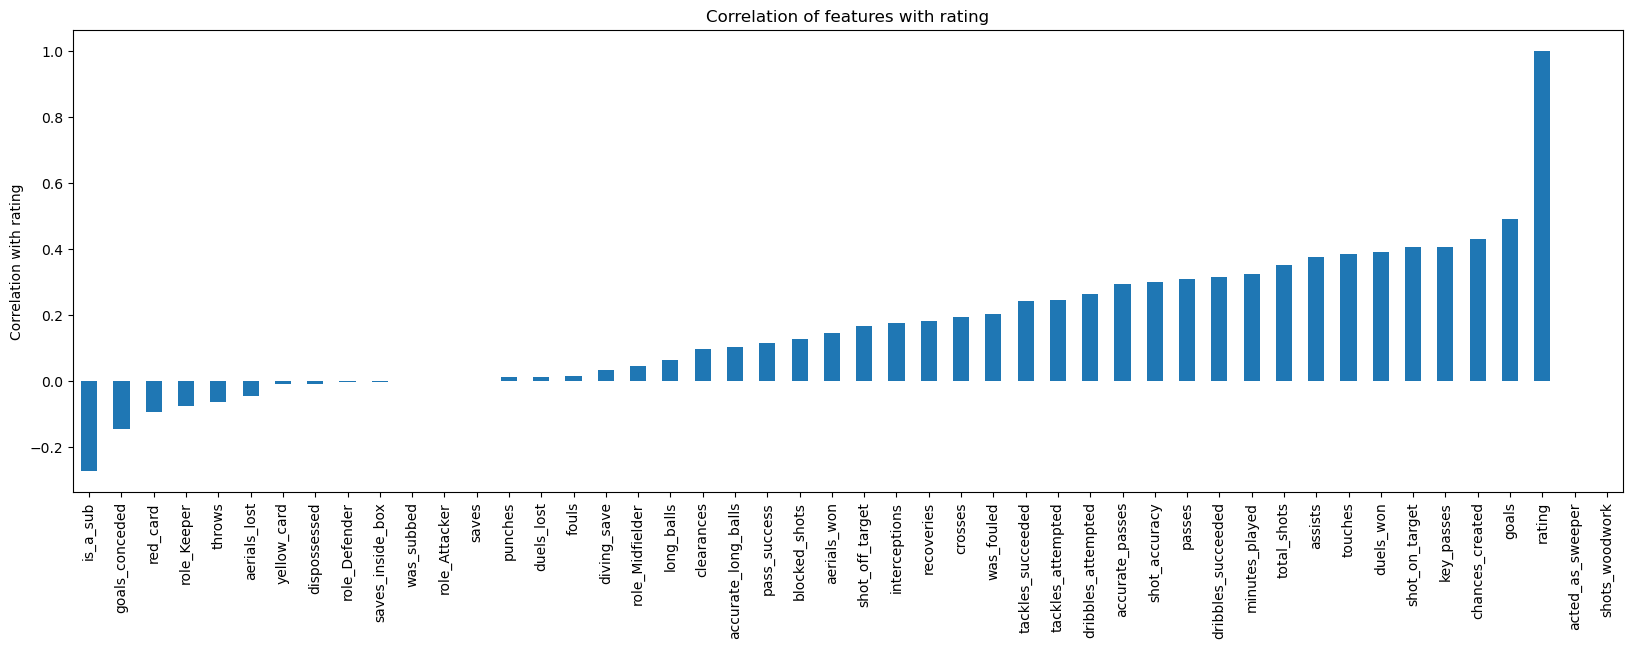

In [21]:
correlation = df.corr()['rating'].sort_values()
plt.figure(figsize=(20,6))
correlation.plot(kind='bar')  
plt.xticks(rotation=90)       
plt.ylabel('Correlation with rating')
plt.title('Correlation of features with rating')
plt.show()

<Axes: xlabel='goals', ylabel='rating'>

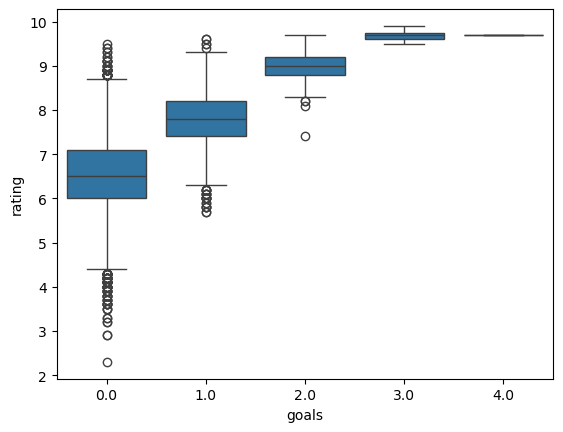

In [22]:
sns.boxplot(data=df, x='goals', y='rating')

<Axes: xlabel='chances_created', ylabel='rating'>

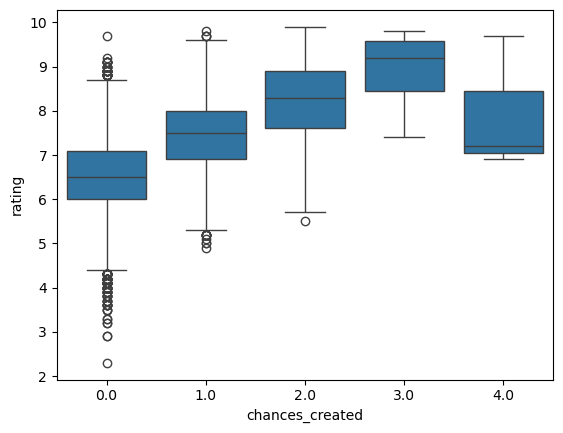

In [23]:
sns.boxplot(data=df, x='chances_created', y='rating')

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
df.columns

Index(['acted_as_sweeper', 'diving_save', 'goals_conceded', 'minutes_played',
       'punches', 'saves', 'saves_inside_box', 'throws', 'accurate_passes',
       'assists', 'chances_created', 'goals', 'pass_success', 'total_shots',
       'blocked_shots', 'shot_accuracy', 'shot_off_target', 'shot_on_target',
       'shots_woodwork', 'accurate_long_balls', 'crosses', 'key_passes',
       'long_balls', 'passes', 'touches', 'aerials_lost', 'aerials_won',
       'clearances', 'dispossessed', 'dribbles_attempted',
       'dribbles_succeeded', 'duels_lost', 'duels_won', 'fouls',
       'interceptions', 'recoveries', 'tackles_attempted', 'tackles_succeeded',
       'was_fouled', 'is_a_sub', 'was_subbed', 'yellow_card', 'red_card',
       'rating', 'role_Attacker', 'role_Defender', 'role_Keeper',
       'role_Midfielder'],
      dtype='object')

In [31]:
X=df[['acted_as_sweeper', 'diving_save', 'goals_conceded', 'minutes_played',
       'punches', 'saves', 'saves_inside_box', 'throws', 'accurate_passes',
       'assists', 'chances_created', 'goals', 'pass_success', 'total_shots',
       'blocked_shots', 'shot_accuracy', 'shot_off_target', 'shot_on_target',
       'shots_woodwork', 'accurate_long_balls', 'crosses', 'key_passes',
       'long_balls', 'passes', 'touches', 'aerials_lost', 'aerials_won',
       'clearances', 'dispossessed', 'dribbles_attempted',
       'dribbles_succeeded', 'duels_lost', 'duels_won', 'fouls',
       'interceptions', 'recoveries', 'tackles_attempted', 'tackles_succeeded',
       'was_fouled', 'is_a_sub', 'was_subbed', 'yellow_card', 'red_card',
        'role_Attacker', 'role_Defender', 'role_Keeper',
       'role_Midfielder']].values
y = df['rating'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [36]:
X_train = scaler.transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [41]:
len(df.columns)

48

In [69]:
model = Sequential()

model.add(Dense(20, activation='relu'))  
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))


In [70]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

In [71]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [72]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=600,batch_size=16,callbacks=[early_stop])

Epoch 1/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.2162 - val_loss: 0.7922
Epoch 2/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.2175 - val_loss: 0.6552
Epoch 3/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.5003 - val_loss: 0.8372
Epoch 4/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9157 - val_loss: 0.9232
Epoch 5/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6313 - val_loss: 0.5349
Epoch 6/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.4698 - val_loss: 0.4630
Epoch 7/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3737 - val_loss: 0.4337
Epoch 8/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3362 - val_loss: 0.3192
Epoch 9/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.3114 - val_loss: 0.3201
Epoch 10/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2933 - val_loss: 0.2934
Epoch 11/600
795/795 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2861 - val_loss: 0.3190
Epoch 12/600
795/795 ━━━━━━━━━━━━━━━━━━━━

In [73]:
loss = pd.DataFrame(model.history.history)

(0.0, 1.5)

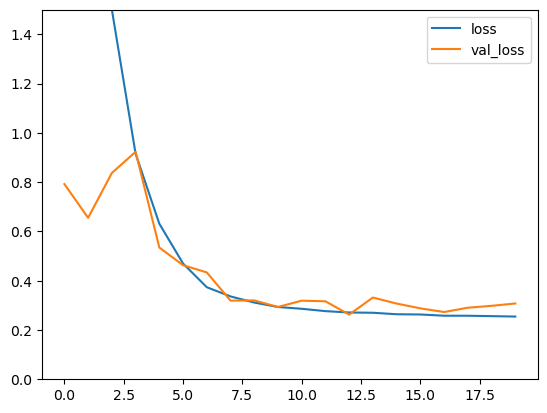

In [77]:
ax = loss.plot()
ax.set_ylim(0,1.5)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
predictions = model.predict(X_test)

265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [81]:
mean_absolute_error(y_test, predictions)

0.3950795469065728

In [82]:
mean_squared_error(y_test, predictions)

0.26269558633524465

In [86]:
df['rating'].describe()

count    21184.000000
mean         6.696790
std          0.866927
min          2.300000
25%          6.100000
50%          6.700000
75%          7.300000
max          9.900000
Name: rating, dtype: float64

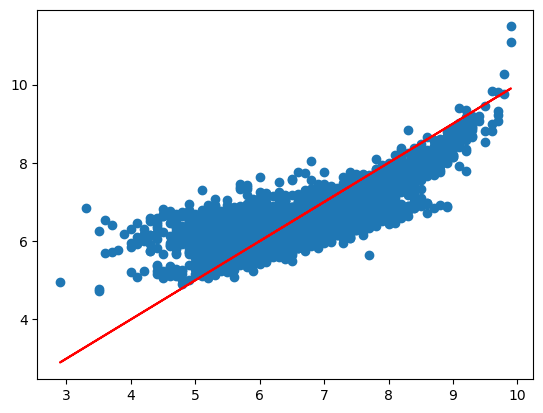

In [95]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [108]:
new_player = [
    0,      # acted_as_sweeper
    0,      # diving_save
    0,      # goals_conceded
    90,     # minutes_played
    0,      # punches
    0,      # saves
    0,      # saves_inside_box
    5,      # throws
    50,     # accurate_passes
    0,      # assists
    2,      # chances_created  
    0,      # goals           
    80,     # pass_success (%)
    5,      # total_shots
    1,      # blocked_shots
    50,     # shot_accuracy (%)
    1,      # shot_off_target
    2,      # shot_on_target
    0,      # shots_woodwork
    15,     # accurate_long_balls
    20,     # crosses
    8,      # key_passes
    8,      # long_balls
    70,     # passes
    75,     # touches
    4,      # aerials_lost
    8,      # aerials_won
    8,      # clearances
    4,      # dispossessed
    10,     # dribbles_attempted
    8,      # dribbles_succeeded
    6,      # duels_lost
    8,      # duels_won
    2,      # fouls
    7,      # interceptions
    15,     # recoveries
    10,     # tackles_attempted
    8,      # tackles_succeeded
    3,      # was_fouled
    0,      # is_a_sub
    0,      # was_subbed
    1,      # yellow_card
    1,      # red_card
    0,      # role_Attacker
    0,      # role_Defender
    0,      # role_Keeper
    1       # role_Midfielder
]

In [107]:
def predict_player_rating(player_stats):
    player_scaled = scaler.transform([player_stats])
    rating = model.predict(player_scaled)[0][0]
    return rating

new_rating = predict_player_rating(new_player)
print(new_rating)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
8.398279
